Contextual Anomaly Detection using Isolation Forest

In [2]:
#import necesary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from datetime import datetime
import plotly.express as px

from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [3]:
#assign parameters for plotting
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [5]:
#read the data
df = pd.read_csv('data/nyc_taxi.csv')

In [7]:
#view the datase 
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [6]:
#get the bsic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [8]:
#convert the date column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
#reconfirm the data type of the timestamp column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [11]:
#view the first 5 rows of the data
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [12]:
#set the index of the dataframe to the timestamp column
df = df.set_index('timestamp').resample('H').mean().reset_index()

In [13]:
#view the first 5 rows of the data
df.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [14]:
#plot the data
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [17]:
#creatr an hour column
df['hour'] = df['timestamp'].dt.hour

In [15]:
#create a categorical weekday column
df['weekday'] = pd.Categorical(df['timestamp'].dt.day_name(), categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [18]:
#confirm current data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   weekday    5160 non-null   category      
 3   hour       5160 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.4 KB


In [19]:
#view the dataframe
df

,timestamp,value,weekday,hour
0,2014-07-01 00:00:00,9485.5,Tuesday,0
1,2014-07-01 01:00:00,5433.0,Tuesday,1
2,2014-07-01 02:00:00,3346.5,Tuesday,2
3,2014-07-01 03:00:00,2216.5,Tuesday,3
4,2014-07-01 04:00:00,2189.5,Tuesday,4
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19
5156,2015-01-31 20:00:00,24138.0,Saturday,20
5157,2015-01-31 21:00:00,24194.5,Saturday,21
5158,2015-01-31 22:00:00,26515.0,Saturday,22


<AxesSubplot: xlabel='hour'>

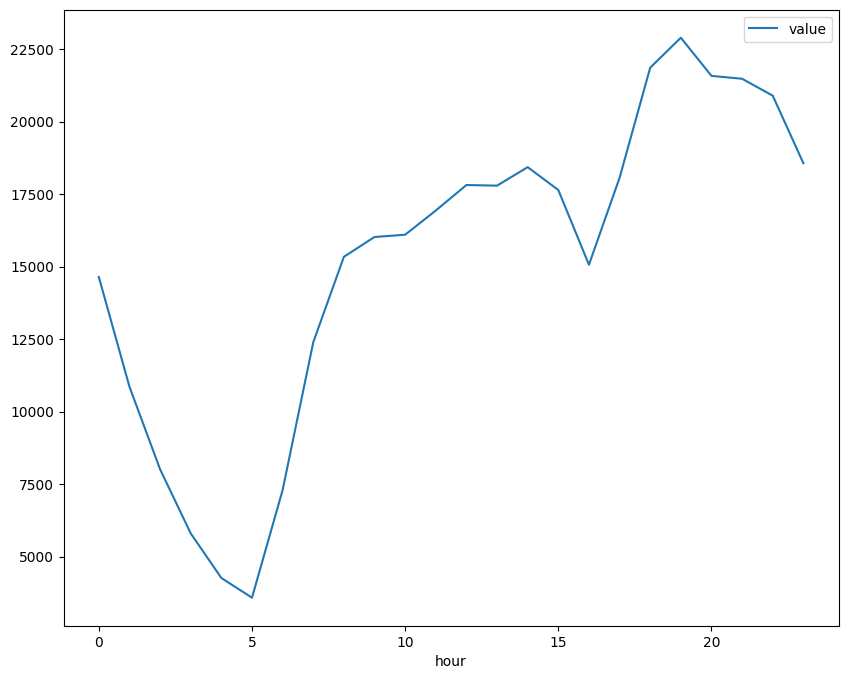

In [21]:
#plot the average trips by hour
df[['value', 'hour']].groupby('hour').mean().plot()

In [20]:
#plot the trips by hour
fig = px.line(df, x='hour', y='value', title='NYC Taxi Demand by Hour')
fig.show()


<AxesSubplot: xlabel='weekday'>

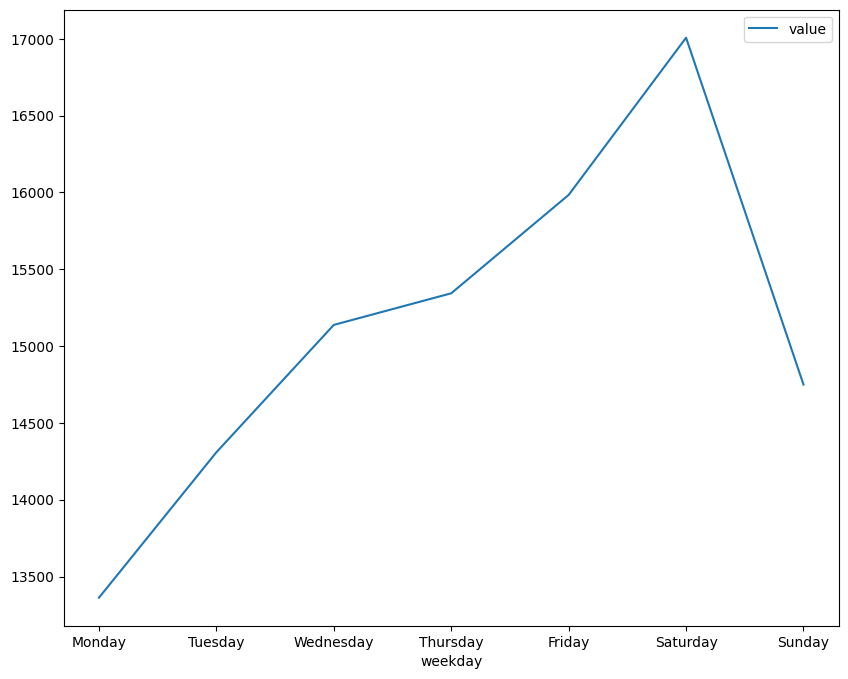

In [22]:
#plot the average trips by weekday
df[['value', 'weekday']].groupby('weekday').mean().plot()

In [23]:
#plot both the average trips by hour and weekday
fig = px.line(df, x='hour', y='value', color='weekday', title='NYC Taxi Demand by Hour and Weekday')
fig.show()


<AxesSubplot: xlabel='hour'>

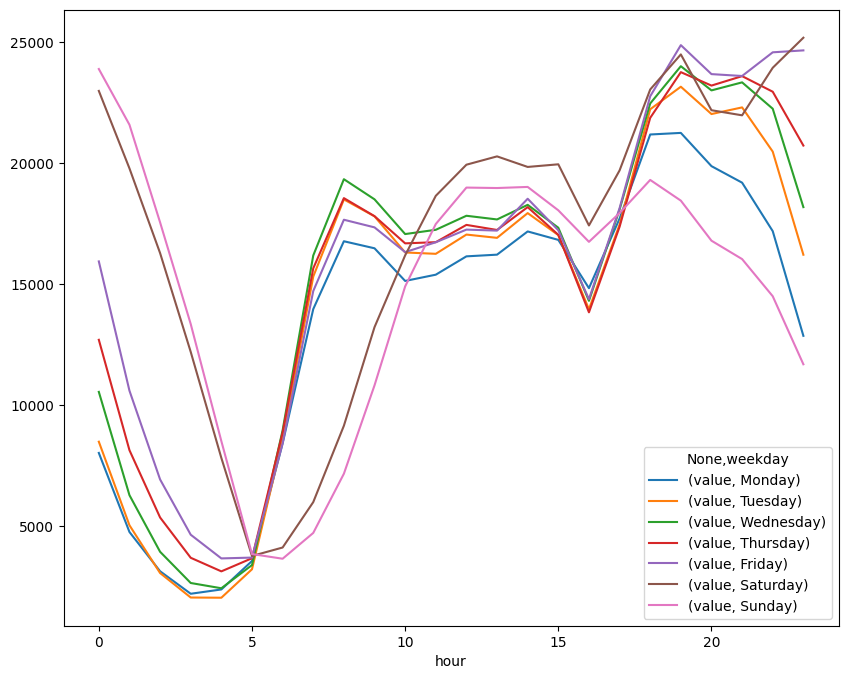

In [25]:
#plot the average trips by hour and weekday
df.groupby(['hour', 'weekday']).mean().unstack().plot()

In [28]:
#create a column with the average trips on the recorded timestamp and assign the data to a differnt dataframe
df_final = df.join(df.groupby(['hour', 'weekday'])['value'].mean(), on=['hour', 'weekday'], rsuffix='_avg')

#view the dataframe
df_final


,timestamp,value,weekday,hour,value_avg
0,2014-07-01 00:00:00,9485.5,Tuesday,0,8483.709677
1,2014-07-01 01:00:00,5433.0,Tuesday,1,5028.193548
2,2014-07-01 02:00:00,3346.5,Tuesday,2,3052.112903
3,2014-07-01 03:00:00,2216.5,Tuesday,3,2039.580645
4,2014-07-01 04:00:00,2189.5,Tuesday,4,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19,24501.870968
5156,2015-01-31 20:00:00,24138.0,Saturday,20,22193.758065
5157,2015-01-31 21:00:00,24194.5,Saturday,21,21983.241935
5158,2015-01-31 22:00:00,26515.0,Saturday,22,23949.951613


Some Anomalous Points Existed based on occurence in the area

In [30]:
# NYC marathon - 2014-11-02
# Thanksgiving - 2014-11-27
# Christmas - 2014-12-25
# New Year's - 2015-01-01
# Snow Blizzard - 2015-01-26 and 2015-01-27

In [34]:
#checking the data for the NYC marathon
df_final.set_index('timestamp').loc['2014-11-02']

,value,weekday,hour,value_avg
timestamp,,,,
2014-11-02 00:00:00,24109.5,Sunday,0,23898.733333
2014-11-02 01:00:00,37204.5,Sunday,1,21593.533333
2014-11-02 02:00:00,12754.5,Sunday,2,17555.266667
2014-11-02 03:00:00,8955.5,Sunday,3,13350.550000
2014-11-02 04:00:00,5453.5,Sunday,4,8506.500000
2014-11-02 05:00:00,5174.0,Sunday,5,3837.450000
2014-11-02 06:00:00,4920.0,Sunday,6,3643.983333
2014-11-02 07:00:00,5592.0,Sunday,7,4711.300000
2014-11-02 08:00:00,7525.5,Sunday,8,7159.516667


In [35]:
#checking the data for the Thanksgiving
df_final.set_index('timestamp').loc['2014-11-27']

,value,weekday,hour,value_avg
timestamp,,,,
2014-11-27 00:00:00,12422.5,Thursday,0,12698.500000
2014-11-27 01:00:00,9592.5,Thursday,1,8132.564516
2014-11-27 02:00:00,7679.5,Thursday,2,5350.209677
2014-11-27 03:00:00,5918.5,Thursday,3,3683.177419
2014-11-27 04:00:00,4709.0,Thursday,4,3121.677419
2014-11-27 05:00:00,3627.5,Thursday,5,3664.580645
2014-11-27 06:00:00,5056.5,Thursday,6,8868.306452
2014-11-27 07:00:00,6233.5,Thursday,7,15654.145161
2014-11-27 08:00:00,7444.5,Thursday,8,18558.096774


In [36]:
#checking the data for the Christmas
df_final.set_index('timestamp').loc['2014-12-25']

,value,weekday,hour,value_avg
timestamp,,,,
2014-12-25 00:00:00,10277.5,Thursday,0,12698.500000
2014-12-25 01:00:00,7848.5,Thursday,1,8132.564516
2014-12-25 02:00:00,5691.5,Thursday,2,5350.209677
2014-12-25 03:00:00,3708.5,Thursday,3,3683.177419
2014-12-25 04:00:00,2699.5,Thursday,4,3121.677419
2014-12-25 05:00:00,1778.5,Thursday,5,3664.580645
2014-12-25 06:00:00,2427.0,Thursday,6,8868.306452
2014-12-25 07:00:00,2833.0,Thursday,7,15654.145161
2014-12-25 08:00:00,3205.5,Thursday,8,18558.096774


In [37]:
#checking the data for the New Year's
df_final.set_index('timestamp').loc['2015-01-01']

,value,weekday,hour,value_avg
timestamp,,,,
2015-01-01 00:00:00,25850.0,Thursday,0,12698.500000
2015-01-01 01:00:00,29292.0,Thursday,1,8132.564516
2015-01-01 02:00:00,25753.5,Thursday,2,5350.209677
2015-01-01 03:00:00,22067.0,Thursday,3,3683.177419
2015-01-01 04:00:00,15399.5,Thursday,4,3121.677419
2015-01-01 05:00:00,7949.0,Thursday,5,3664.580645
2015-01-01 06:00:00,5565.5,Thursday,6,8868.306452
2015-01-01 07:00:00,4993.0,Thursday,7,15654.145161
2015-01-01 08:00:00,4675.0,Thursday,8,18558.096774


In [39]:
#checking the data for the Snow Blizzard
df_final.set_index('timestamp').loc['2015-01-26':'2015-01-27']

,value,weekday,hour,value_avg
timestamp,,,,
2015-01-26 00:00:00,5907.0,Monday,0,8020.283333
2015-01-26 01:00:00,3649.5,Monday,1,4749.750000
2015-01-26 02:00:00,2310.0,Monday,2,3125.800000
2015-01-26 03:00:00,1949.5,Monday,3,2195.133333
2015-01-26 04:00:00,2165.5,Monday,4,2373.166667
2015-01-26 05:00:00,3723.0,Monday,5,3550.800000
2015-01-26 06:00:00,9146.0,Monday,6,8414.566667
2015-01-26 07:00:00,15835.5,Monday,7,13968.766667
2015-01-26 08:00:00,18804.5,Monday,8,16774.483333


In [40]:
#create the day column 
df_final['day'] = df_final['timestamp'].dt.weekday

In [41]:
#view the dataframe
df_final

,timestamp,value,weekday,hour,value_avg,day
0,2014-07-01 00:00:00,9485.5,Tuesday,0,8483.709677,1
1,2014-07-01 01:00:00,5433.0,Tuesday,1,5028.193548,1
2,2014-07-01 02:00:00,3346.5,Tuesday,2,3052.112903,1
3,2014-07-01 03:00:00,2216.5,Tuesday,3,2039.580645,1
4,2014-07-01 04:00:00,2189.5,Tuesday,4,2031.258065,1
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19,24501.870968,5
5156,2015-01-31 20:00:00,24138.0,Saturday,20,22193.758065,5
5157,2015-01-31 21:00:00,24194.5,Saturday,21,21983.241935,5
5158,2015-01-31 22:00:00,26515.0,Saturday,22,23949.951613,5


In [42]:
#create a new dataframe with the columns: value, hour, day for use in building the model
data = df_final[['value', 'hour', 'day']]

In [43]:
#create the isolaton forest model
model = IsolationForest(contamination=0.005, max_features = 3, max_samples = 0.8, n_estimators = 200) 

#fit the model
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [44]:
#create a column with the predicted anomalies
df_final['outliers'] = pd.Series(model.predict(data)).apply(lambda x: 'yes' if x == -1 else 'no')

In [45]:
#view the records with anomalies
df_final[df_final['outliers'] == 'yes']

,timestamp,value,weekday,hour,value_avg,day,outliers
1488,2014-09-01 00:00:00,13763.0,Monday,0,8020.283333,0,yes
1631,2014-09-06 23:00:00,29418.5,Saturday,23,25192.516129,5,yes
2640,2014-10-19 00:00:00,27146.5,Sunday,0,23898.733333,6,yes
2977,2014-11-02 01:00:00,37204.5,Sunday,1,21593.533333,6,yes
4271,2014-12-25 23:00:00,7977.5,Thursday,23,20732.241935,3,yes
4416,2015-01-01 00:00:00,25850.0,Thursday,0,12698.500000,3,yes
4417,2015-01-01 01:00:00,29292.0,Thursday,1,8132.564516,3,yes
4418,2015-01-01 02:00:00,25753.5,Thursday,2,5350.209677,3,yes
4419,2015-01-01 03:00:00,22067.0,Thursday,3,3683.177419,3,yes
4511,2015-01-04 23:00:00,8402.0,Sunday,23,11686.450000,6,yes


In [47]:
#plot the data with the anomalies
fig = px.line(df_final, x='timestamp', y='value', color='outliers', hover_data = ['weekday', 'hour', 'value_avg'], title='NYC Taxi Demand with Anomalies')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
#view decision function
score = model.decision_function(data)

#view the score
score

array([0.10359502, 0.14777813, 0.16669054, ..., 0.14539779, 0.10825332,
       0.08917158])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   2.,   2.,   2.,   3.,   3.,   3.,   4.,   4.,
          3.,  12.,  14.,  14.,  16.,  27.,  23.,  41.,  60.,  70.,  93.,
         93., 136., 148., 195., 245., 289., 342., 402., 477., 492., 469.,
        422., 360., 249., 257., 134.,  50.]),
 array([-0.15601616, -0.14878724, -0.14155832, -0.1343294 , -0.12710048,
        -0.11987156, -0.11264264, -0.10541372, -0.0981848 , -0.09095588,
        -0.08372696, -0.07649804, -0.06926913, -0.06204021, -0.05481129,
        -0.04758237, -0.04035345, -0.03312453, -0.02589561, -0.01866669,
        -0.01143777, -0.00420885,  0.00302007,  0.01024899,  0.01747791,
         0.02470683,  0.03193575,  0.03916467,  0.04639359,  0.05362251,
         0.06085143,  0.06808035,  0.07530927,  0.08253818,  0.0897671 ,
         0.09699602,  0.10422494,  0.11145386,  0.11868278,  0.1259117 ,
         0.13314062,  0.14036954,  0.14759846,  0.15482738,  0.1620563 ,
 

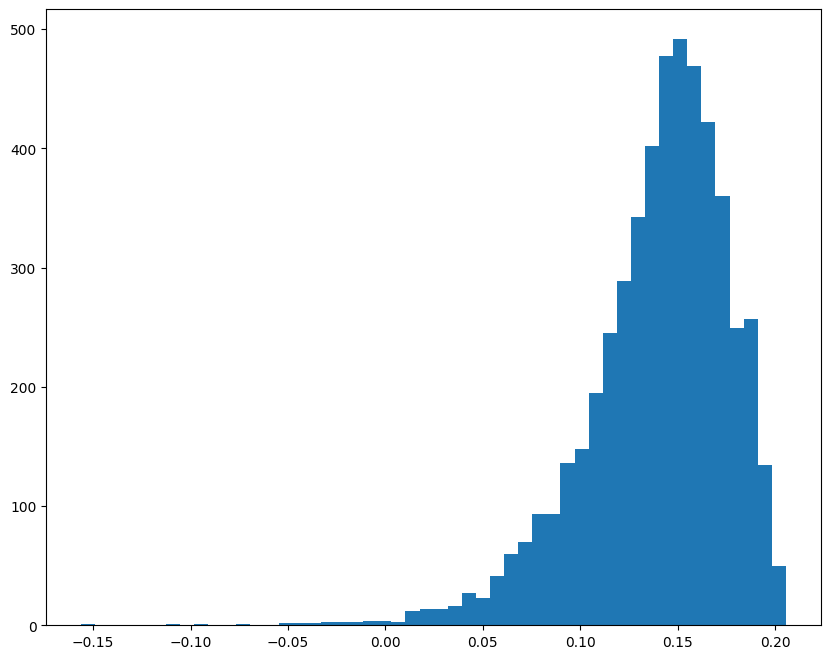

In [49]:
#plot a histogram of the score
plt.hist(score, bins = 50)

In [50]:
#assign score to final dataframe
df_final['score'] = score

In [51]:
#view the dataframe
df_final

,timestamp,value,weekday,hour,value_avg,day,outliers,score
0,2014-07-01 00:00:00,9485.5,Tuesday,0,8483.709677,1,no,0.103595
1,2014-07-01 01:00:00,5433.0,Tuesday,1,5028.193548,1,no,0.147778
2,2014-07-01 02:00:00,3346.5,Tuesday,2,3052.112903,1,no,0.166691
3,2014-07-01 03:00:00,2216.5,Tuesday,3,2039.580645,1,no,0.171731
4,2014-07-01 04:00:00,2189.5,Tuesday,4,2031.258065,1,no,0.172795
...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19,24501.870968,5,no,0.021502
5156,2015-01-31 20:00:00,24138.0,Saturday,20,22193.758065,5,no,0.150370
5157,2015-01-31 21:00:00,24194.5,Saturday,21,21983.241935,5,no,0.145398
5158,2015-01-31 22:00:00,26515.0,Saturday,22,23949.951613,5,no,0.108253


In [53]:
#view using a threshold of -0.02
df_final[df_final['score'] < -0.02]

,timestamp,value,weekday,hour,value_avg,day,outliers,score
1488,2014-09-01 00:00:00,13763.0,Monday,0,8020.283333,0,yes,-0.033310
1631,2014-09-06 23:00:00,29418.5,Saturday,23,25192.516129,5,yes,-0.041737
2977,2014-11-02 01:00:00,37204.5,Sunday,1,21593.533333,6,yes,-0.156016
4271,2014-12-25 23:00:00,7977.5,Thursday,23,20732.241935,3,yes,-0.024226
4416,2015-01-01 00:00:00,25850.0,Thursday,0,12698.500000,3,yes,-0.037784
4417,2015-01-01 01:00:00,29292.0,Thursday,1,8132.564516,3,yes,-0.091841
4418,2015-01-01 02:00:00,25753.5,Thursday,2,5350.209677,3,yes,-0.032176
4511,2015-01-04 23:00:00,8402.0,Sunday,23,11686.450000,6,yes,-0.027552
5033,2015-01-26 17:00:00,5221.0,Monday,17,17714.100000,0,yes,-0.022197
5035,2015-01-26 19:00:00,4565.5,Monday,19,21255.900000,0,yes,-0.029769
